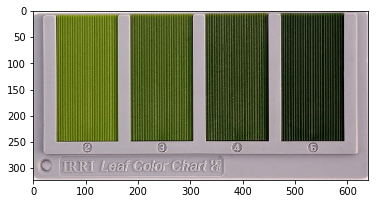

In [65]:
import skimage
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

path ="C:/Users/Velocity_carbon/Desktop/LCC/lcc.jpg"
img =imread(path, as_grey=True);
img2 =imread(path, as_grey=False);

plt.imshow(img2);


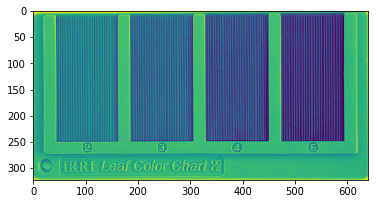

In [66]:
plt.imshow(img);

C:\Users\Velocity_carbon\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


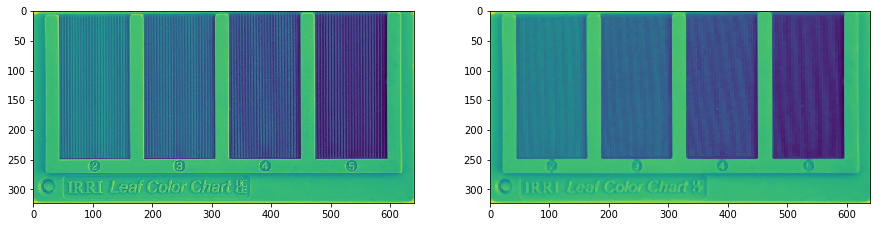

In [67]:
from skimage import filters
denoised_lcc=filters.median(img,selem=np.ones((5,5)))
f,(ax0,ax1)=plt.subplots(1,2,figsize=(15,5))
ax0.imshow(img)
ax1.imshow(denoised_lcc);


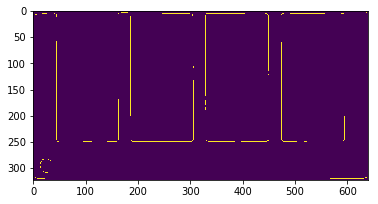

In [68]:
from skimage import feature
edges =skimage.feature.canny(img,sigma=3)

plt.imshow(edges);


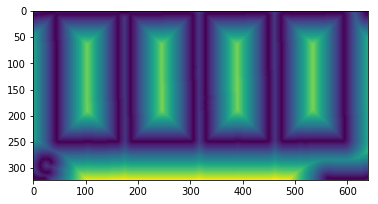

In [69]:
from scipy.ndimage import distance_transform_edt
dt=distance_transform_edt(~edges)

plt.imshow(dt);

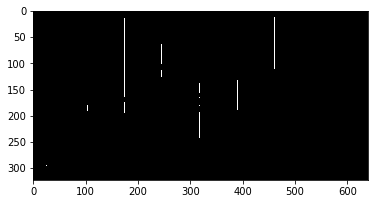

In [70]:
local_max=feature.peak_local_max(dt, indices=False, min_distance=5)
plt.imshow(local_max , cmap='gray');

array([[296,  26],
       [295,  25],
       [284, 596],
       [284, 595],
       [284, 594]], dtype=int64)

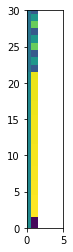

In [71]:
peak_idx = feature.peak_local_max(dt, indices= True , min_distance=5)
axes = plt.gca()
axes.set_xlim([0,5])
axes.set_ylim([0,30])
plt.imshow(peak_idx);
peak_idx[:5]
                            

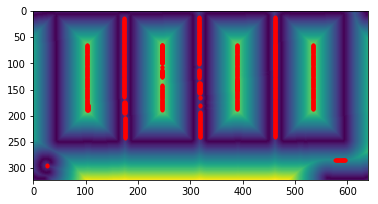

In [72]:
plt.plot(peak_idx[:,1], peak_idx[:,0], 'r.')
plt.imshow(dt);

In [73]:
from skimage import measure
markers = measure.label(local_max)   

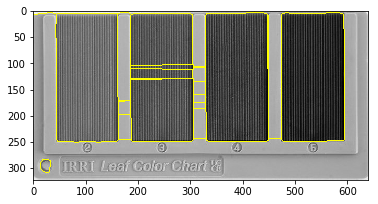

In [74]:
from skimage import morphology , segmentation

labels = morphology.watershed(-dt, markers)
plt.imshow(segmentation.mark_boundaries(img,labels));

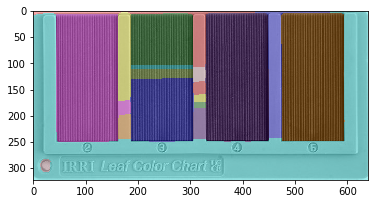

In [75]:
from skimage import color 
plt.imshow(color.label2rgb(labels, image=img));

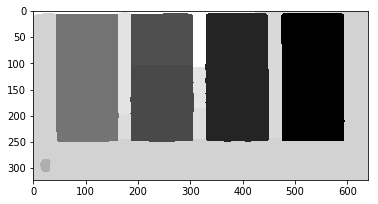

In [76]:
plt.imshow(color.label2rgb(labels, image=img , kind='avg'), cmap='gray');

In [77]:
regions= measure.regionprops(labels, intensity_image=img)

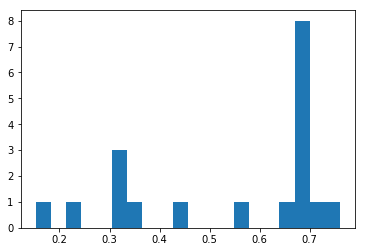

In [78]:
region_means= [r.mean_intensity for r in regions]
plt.hist(region_means, bins=20);

In [79]:
from sklearn.cluster import KMeans
model  = KMeans(n_clusters=2)

region_means=np.array(region_means).reshape(-1,1)

In [80]:
model.fit(region_means)
print(model.cluster_centers_)

[[0.30626408]
 [0.68151404]]


In [81]:
bg_fg_labels=model.predict(region_means)
bg_fg_labels

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [82]:
classified_labels= labels.copy()
for bg_fg, region in zip(bg_fg_labels,regions):
    classified_labels[tuple(region.coords.T)]=bg_fg


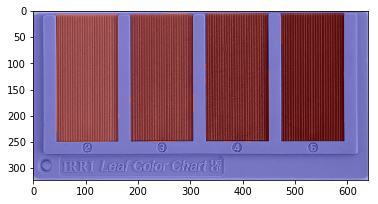

In [89]:
plt.imshow(color.label2rgb(classified_labels, image=img2));

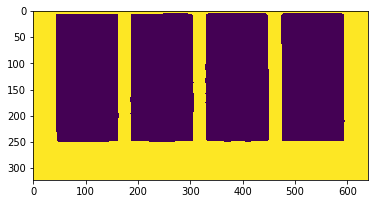

In [84]:
plt.imshow(classified_labels);

In [1]:
import numpy
numpy.set_printoptions(threshold=numpy.nan)

